<center>
<h1><b>Лабораторна робота №2</b></h1>
</center>
<p><b>Тема:</b> Основи роботи з сигналами в Python.</p>
<p><b>Мета:</b> Закріпити теоретичні знання щодо моделювання періодичних сигналів за допомогою ряду Фур’є та різних систем базисних функцій, набути навичок гармонічного аналізу та синтезу.</p>
<center>
<h2><b>Завдання для самостійної роботи</b></h2>
</center>

<p><b>1. Згідно із заданим варіантом розглянути періодичний сигнал та розкласти
його спочатку:</b></p>

 <img src="src\screen1.png" alt="!" style="display:block; margin:auto; width:70%;">

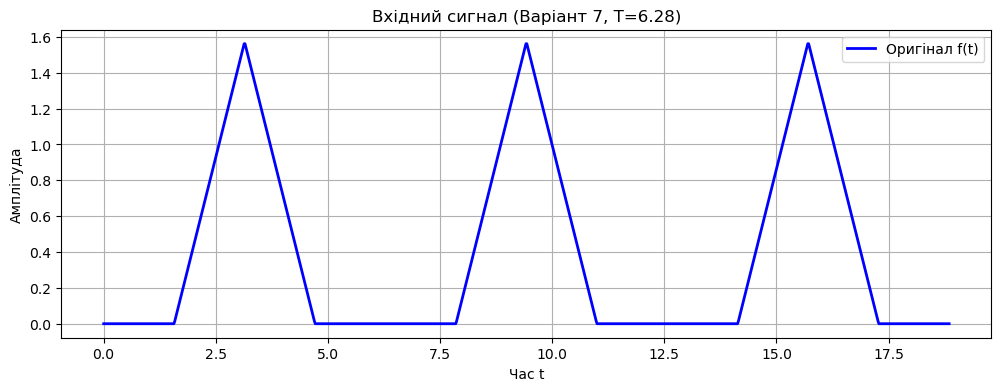

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import hadamard

T = 2 * np.pi           
A = 1.0                
N = 10                  
N_walsh = 8          
t1 = T / 4
t2 = T / 2

def signal_func(t):    
    tm = t % T 
    
    if t1 <= tm <= t2:
        return tm - t1                 
    elif t2 < tm <= (t2 + t1):
        return t2 + t1 - tm             
    else:
        return 0.0                

t_plot = np.linspace(0, 3 * T, 1000)
f_original = get_signal_array(t_plot)

plt.figure(figsize=(12, 4))
plt.plot(t_plot, f_original, 'b', linewidth=2, label='Оригінал f(t)')
plt.title(f'Вхідний сигнал (Варіант 7, T={T:.2f})')
plt.xlabel('Час t')
plt.ylabel('Амплітуда')
plt.grid(True)
plt.legend()
plt.show()

<p><b>1.1. У тригонометричний ряд Фур’є, отримавши коефіцієнти ряду $a_k$ та $b_k$.
 Виконати синтез сигналу. Побудувати відповідні графіки.</b> </p> 

Розрахунок коефіцієнтів
a0 = 0.7854
Перші 3 ak: ['-0.6366', '0.3183', '-0.0707']
Перші 3 bk: ['0.0000', '-0.0000', '0.0000']


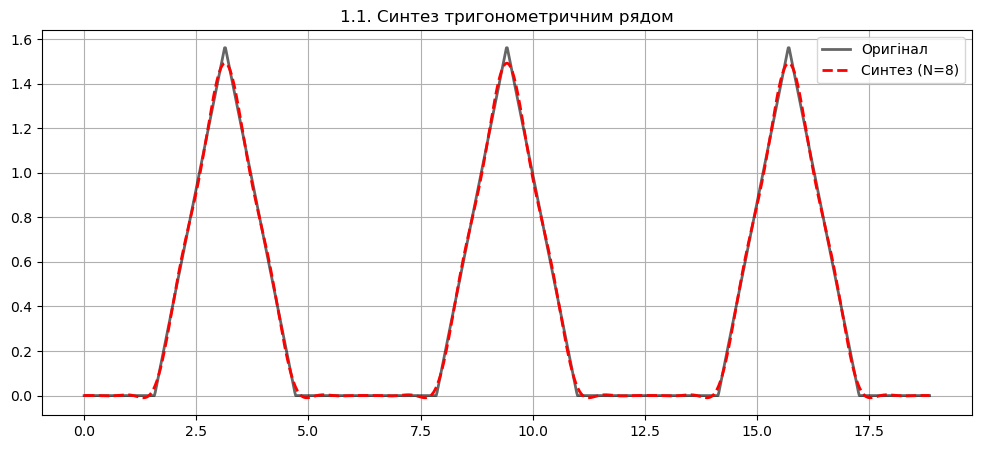

In [29]:
print("Розрахунок коефіцієнтів")
w0 = 2 * np.pi / T 
a0_val, _ = quad(signal_func, 0, T)
a0 = (2 / T) * a0_val
ak = np.zeros(N + 1)
bk = np.zeros(N + 1)
for k in range(1, N + 1):
    res_a, _ = quad(lambda t: signal_func(t) * np.cos(k * w0 * t), 0, T)
    res_b, _ = quad(lambda t: signal_func(t) * np.sin(k * w0 * t), 0, T)
    ak[k] = (2 / T) * res_a
    bk[k] = (2 / T) * res_b

print(f"a0 = {a0:.4f}")
print("Перші 3 ak:", [f"{x:.4f}" for x in ak[1:4]])
print("Перші 3 bk:", [f"{x:.4f}" for x in bk[1:4]])
y_synth_trig = np.full_like(t_plot, a0 / 2)
for k in range(1, N + 1):
    y_synth_trig += ak[k] * np.cos(k * w0 * t_plot) + bk[k] * np.sin(k * w0 * t_plot)
plt.figure(figsize=(12, 5))
plt.plot(t_plot, f_original, 'k', linewidth=2, alpha=0.6, label='Оригінал')
plt.plot(t_plot, y_synth_trig, 'r--', linewidth=2, label=f'Синтез (N={N})')
plt.title('1.1. Синтез тригонометричним рядом')
plt.grid(True)
plt.legend()
plt.show()

<p><b>1.2. У тригонометричний ряд Фур’є, отримавши коефіцієнти $А_k$ , $\phi_k$. 
Побудувати амплітудний та фазовий спектр. Виконати синтез сигналу.</b></p>

Побудова спектрів


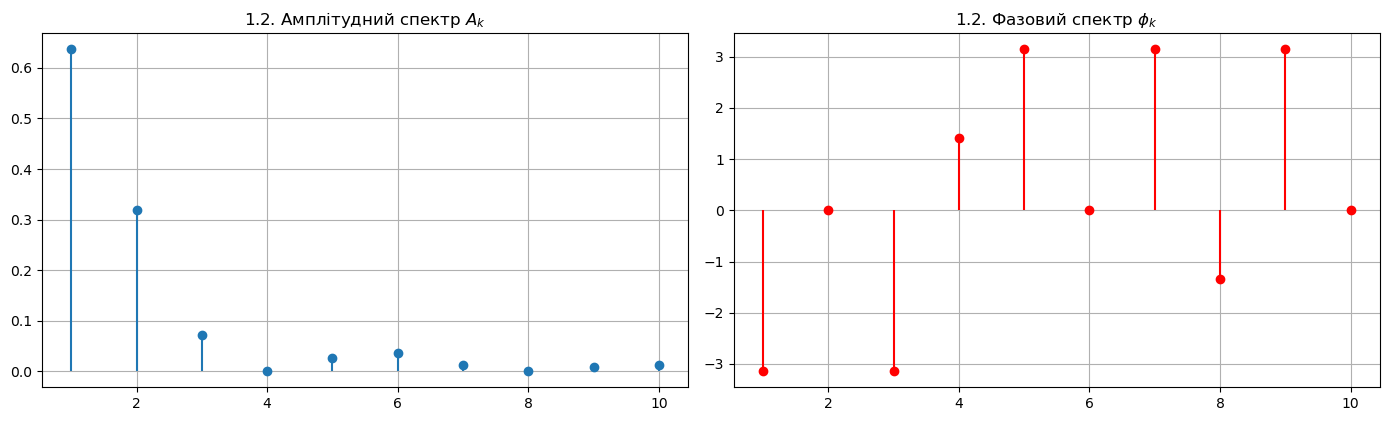

In [19]:
print("Побудова спектрів")
k_vals = np.arange(1, N + 1)
A_k = np.sqrt(ak[1:]**2 + bk[1:]**2)
phi_k = -np.arctan2(bk[1:], ak[1:])
C_k_vals = (ak[1:] - 1j * bk[1:]) / 2
C_k_abs = np.abs(C_k_vals)
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.stem(k_vals, A_k, basefmt=" ")
plt.title(r'1.2. Амплітудний спектр $A_k$')  
plt.grid(True)
plt.subplot(2, 2, 2)
plt.stem(k_vals, phi_k, linefmt='r', markerfmt='ro', basefmt=" ")
plt.title(r'1.2. Фазовий спектр $\phi_k$')
plt.grid(True)
plt.tight_layout()
plt.show()

<p><b>1.3. У комплексний ряд Фур’є. Побудувати амплітудний та фазовий спектри. 
Виконати синтез сигналу.</p></b>

1.3. Розрахунок комплексних коефіцієнтів C_k


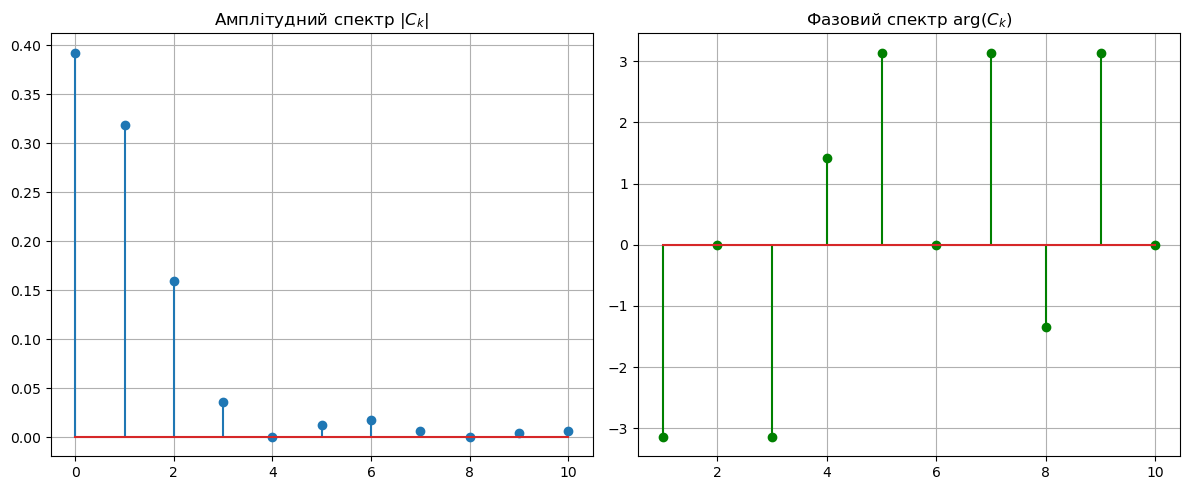

In [28]:
print("1.3. Розрахунок комплексних коефіцієнтів C_k")
C_k_vals = (ak_list[1:] - 1j * bk_list[1:]) / 2
C_0 = a0 / 2
Ck_mod = np.abs(C_k_vals)
Ck_arg = np.angle(C_k_vals)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem([0] + list(k_vals), [np.abs(C_0)] + list(Ck_mod))
plt.title('Амплітудний спектр $|C_k|$')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.stem(k_vals, Ck_arg, linefmt='g', markerfmt='go')
plt.title('Фазовий спектр arg($C_k$)')
plt.grid(True)
plt.tight_layout()
plt.show()

<p><b>1.4. У ряд Фур’є за системою базисних функцій Уолша-Пелі.
    
1.5. Кількість гармонік: N=8. Побудувати відповідний спектр сигналу. 
Виконати синтез сигналу.</p></b>

Коефіцієнти Уолша (W_k):
['0.3927', '-0.0000', '0.0008', '0.1963', '-0.0008', '-0.1963', '-0.3927', '0.0000']


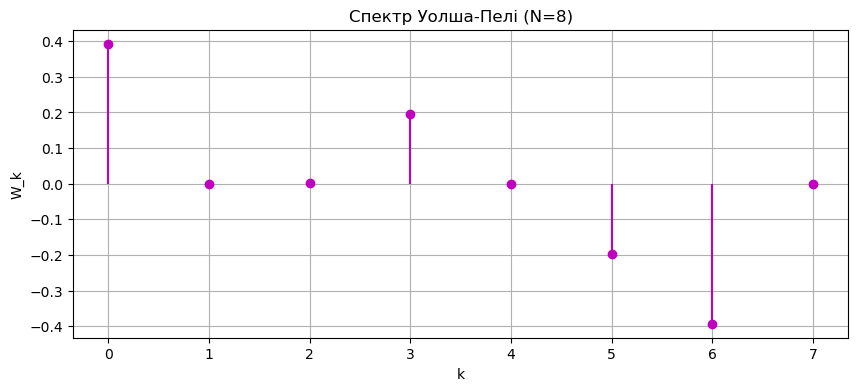

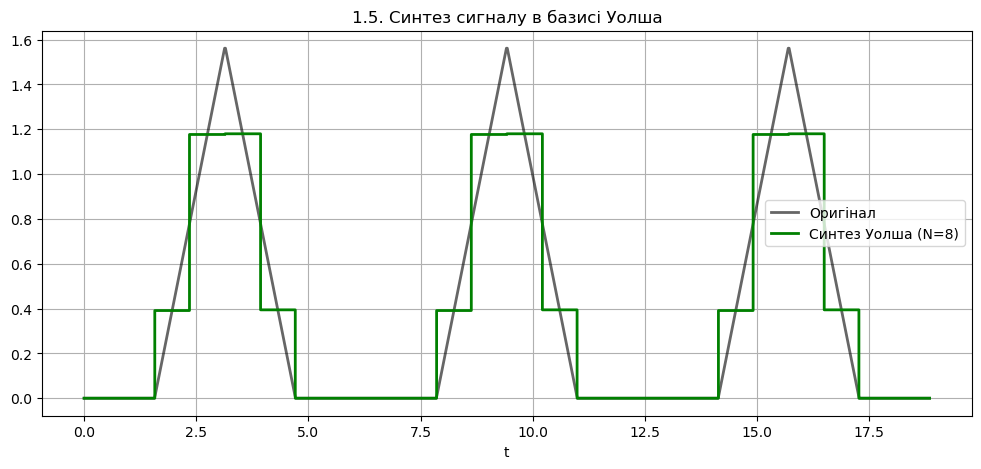

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
def get_walsh_matrix(n_funcs, t_arr, period):
    H = hadamard(n_funcs)
    t_norm = (t_arr % period) / period
    indices = np.floor(t_norm * n_funcs).astype(int)
    indices = np.clip(indices, 0, n_funcs - 1)
    return H[:, indices]

t_samples = np.linspace(0, T, 2048, endpoint=False)
y_samples = get_signal_array(t_samples)
W_matrix = get_walsh_matrix(N_walsh, t_samples, T)

walsh_coeffs = np.mean(y_samples * W_matrix, axis=1)

print("Коефіцієнти Уолша (W_k):")
print([f"{w:.4f}" for w in walsh_coeffs])

plt.figure(figsize=(10, 4))
plt.stem(np.arange(N_walsh), walsh_coeffs, linefmt='m', markerfmt='mo', basefmt=" ")
plt.title(f'Спектр Уолша-Пелі (N={N_walsh})')
plt.xlabel('k')
plt.ylabel('W_k')
plt.grid(True)
plt.show()

def synthesize_walsh(t_arr, coeffs, period):
    n = len(coeffs)
    W_mat = get_walsh_matrix(n, t_arr, period)
    return np.dot(coeffs, W_mat)

y_synth_walsh = synthesize_walsh(t_plot, walsh_coeffs, T)

plt.figure(figsize=(12, 5))
plt.plot(t_plot, y_original, 'k', linewidth=2, alpha=0.6, label='Оригінал')
plt.step(t_plot, y_synth_walsh, 'g', where='mid', linewidth=2, label=f'Синтез Уолша (N={N_walsh})')
plt.title(f'1.5. Синтез сигналу в базисі Уолша')
plt.xlabel('t')
plt.grid(True)
plt.legend()
plt.show()

<p><b>
    
2. Синтезувати ( відновити) сигнали у кожному базисі. Зобразити на   одному 
графіку вихідний сигнал, синтезований за допомогою тригонометричного 
ряду Фур’є та синтезований за допомогою базису Уолша-Пелі.
    
3. Обчислити норму похибки апроксимації для кожного з базисів для одного 
й того самого значення N. Зробити висновки щодо якості апроксимації 
кожним з методів.</p></b>

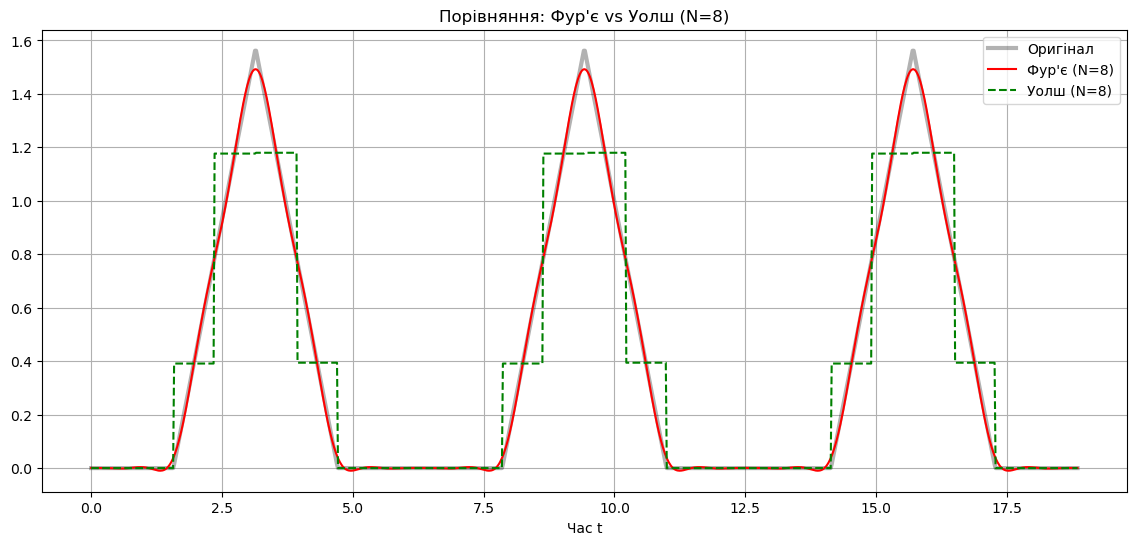

Похибка апроксимації (для N=8):
Тригонометричний ряд Фур'є:
L2 (Похибка):        0.42562
Ряд Уолша-Пелі:
L2 (Похибка):        5.04448
ВИСНОВОК: Для плавного сигналу ряд Фур'є дає меншу похибку.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.linalg import hadamard

T = 2 * np.pi
N = 8
t1 = T / 4
t2 = T / 2

def signal_func(t):
    t = t % T
    if t1 <= t <= t2: return t - t1
    elif t2 < t <= (t2 + t1): return t2 + t1 - t
    else: return 0

def get_signal_array(t_arr):
    tm = t_arr % T
    return np.where((tm >= t1) & (tm <= t2), tm - t1,
           np.where((tm > t2) & (tm <= t2 + t1), t2 + t1 - tm, 0))

def get_walsh_matrix(n_funcs, t_arr, period):
    H = hadamard(n_funcs)
    t_norm = (t_arr % period) / period
    indices = np.floor(t_norm * n_funcs).astype(int)
    indices = np.clip(indices, 0, n_funcs - 1)
    return H[:, indices]

t_plot = np.linspace(0, 3 * T, 1000)
y_original = get_signal_array(t_plot)

w0 = 2 * np.pi / T
a0_val, _ = quad(signal_func, 0, T)
y_fourier = np.full_like(t_plot, (2/T)*a0_val / 2)

for k in range(1, N + 1):
    ak, _ = quad(lambda t: signal_func(t) * np.cos(k * w0 * t), 0, T)
    bk, _ = quad(lambda t: signal_func(t) * np.sin(k * w0 * t), 0, T)
    y_fourier += (2/T)*ak * np.cos(k * w0 * t_plot) + (2/T)*bk * np.sin(k * w0 * t_plot)

t_samples = np.linspace(0, T, 2048, endpoint=False)
y_samples_walsh = get_signal_array(t_samples)
W_matrix_samples = get_walsh_matrix(N, t_samples, T)
walsh_coeffs = np.mean(y_samples_walsh * W_matrix_samples, axis=1)

W_matrix_plot = get_walsh_matrix(N, t_plot, T)
y_walsh = np.dot(walsh_coeffs, W_matrix_plot)

# 2. Порівняння на одному графіку
plt.figure(figsize=(14, 6))

plt.plot(t_plot, y_original, 'k', linewidth=3, alpha=0.3, label='Оригінал')
plt.plot(t_plot, y_fourier, 'r', linewidth=1.5, label=f"Фур'є (N={N})")
plt.plot(t_plot, y_walsh, 'g--', linewidth=1.5, label=f"Уолш (N={N})")

plt.title(f"Порівняння: Фур'є vs Уолш (N={N})")
plt.xlabel('Час t')
plt.legend()
plt.grid(True)
plt.show()

# 3. Обчислення похибки
l2_f = np.linalg.norm(y_original - y_fourier)
l2_w = np.linalg.norm(y_original - y_walsh)


print(f"Похибка апроксимації (для N={N}):")
print(f"Тригонометричний ряд Фур'є:")
print(f"L2 (Похибка):        {l2_f:.5f}")
print(f"Ряд Уолша-Пелі:")
print(f"L2 (Похибка):        {l2_w:.5f}")

if l2_f < l2_w:
    print("ВИСНОВОК: Для плавного сигналу ряд Фур'є дає меншу похибку.")
else:
    print("ВИСНОВОК: Ряд Уолша дає меншу похибку це характерно для прямокутних сигналів.")

<h1><b>Контрольні запитання</b></h1>

1. Як впливає симетрія періодичного сигналу (парна, непарна, відсутність симетрії) на структуру його тригонометричного ряду Фур’є?

Парна функція ($f(t) = f(-t)$): Ряд містить тільки косинуси (член $a_k$). Коефіцієнти при синусах $b_k = 0$.

Непарна функція ($f(t) = -f(-t)$): Ряд містить тільки синуси (член $b_k$). Коефіцієнти при косинусах $a_k = 0$ (і $a_0 = 0$).

Відсутність симетрії: У ряді присутні і косинуси ($a_k \neq 0$), і синуси ($b_k \neq 0$).

2. Чому для апроксимації прямокутного імпульсу базис Уолша-Пелі часто забезпечує меншу похибку порівняно з базисом Фур’є при однаковій кількості базисних функцій?

Тому що функції Уолша самі по собі є прямокутними (приймають значення $+1$ або $-1$). Вони "структурно рідні" для прямокутних сигналів, тому можуть описати різкі перепади (сходинки) дуже точно малою кількістю функцій.
Базис Фур'є складається з гладких синусоїд, яким важко описувати різкі кути (виникає ефект Гіббса), тому для точного прямокутника потрібно дуже багато гармонік.

3. Як пов’язані між собою три форми ряду Фур’є (тригонометрична, амплітудно-фазова, комплексна)?

Це три способи запису одного й того ж сигналу. Перехід між коефіцієнтами виконується за формулами:

Амплітуда: $A_k = \sqrt{a_k^2 + b_k^2}$

Фаза: $\phi_k = -\operatorname{arctg}\left(\frac{b_k}{a_k}\right)$

Комплексний коефіцієнт: $C_k = \frac{1}{2}(a_k - j b_k)$

4. Що таке узагальнений ряд Фур’є? Наведіть умови, за яких система функцій є ортонормованою.

Це розкладання сигналу по будь-якій системі ортогональних функцій.
Умови ортонормованості:
Ортогональність: Скалярний добуток (інтеграл добутку) двох різних функцій дорівнює 0.
Нормованість: Скалярний добуток функції самої на себе (її енергія) дорівнює 1.
Це важливо, бо дозволяє обчислювати кожен коефіцієнт окремо, не розв'язуючи складні системи рівнянь.

5. Чи можна використовувати базис Уолша для апроксимації гладкого синусоїдального сигналу? Яка буде похибка порівняно з базисом Фур’є?

Так, використовувати можна, але це неефективно.
Похибка буде значно більшою, ніж у базисі Фур'є (при тому самому $N$).
Обґрунтування: Базис Уолша — це сходинки. Щоб зі сходинок викласти плавну синусоїду, потрібно дуже багато дрібних сходинок (велика кількість базисних функцій).